In [ ]:
install.packages(c("FactoMineR", "factoextra"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘later’, ‘lazyeval’, ‘corrplot’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘htmlwidgets’, ‘httpuv’, ‘crosstalk’, ‘promises’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘Rcpp’, ‘viridis’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggrepel’, ‘abind’, ‘dendextend’, ‘ggpubr’, ‘reshape2’




In [ ]:
install.packages("FactoMineR")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library("ggplot2")
library("FactoMineR")
library("factoextra")

In [ ]:
data <- read.csv("https://raw.githubusercontent.com/agricolamz/2019_data_analysis_for_linguists/master/data/gospel_freq_words.csv", header=TRUE)
head(data)

,word,John,Luke,Mark,Matthew
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,abide,0.0020627063,0.0004161465,0.0002449780,0.0001473405
2,abraham,0.0016501650,0.0019420169,0.0002449780,0.0010313835
3,abroad,0.0004125413,0.0005548620,0.0009799118,0.0007367025
4,accusation,0.0002062706,0.0002774310,0.0002449780,0.0001473405
5,accuse,0.0004125413,0.0005548620,0.0002449780,0.0001473405
6,adultery,0.0004125413,0.0004161465,0.0007349339,0.0010313835


In [ ]:
res.pca <- PCA(data[, -1], graph = FALSE)

In [ ]:
print(res.pca)

**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 472 individuals, described by 4 variables
*The results are available in the following objects:

   name               description                          
1  "$eig"             "eigenvalues"                        
2  "$var"             "results for the variables"          
3  "$var$coord"       "coord. for the variables"           
4  "$var$cor"         "correlations variables - dimensions"
5  "$var$cos2"        "cos2 for the variables"             
6  "$var$contrib"     "contributions of the variables"     
7  "$ind"             "results for the individuals"        
8  "$ind$coord"       "coord. for the individuals"         
9  "$ind$cos2"        "cos2 for the individuals"           
10 "$ind$contrib"     "contributions of the individuals"   
11 "$call"            "summary statistics"                 
12 "$call$centre"     "mean of the variables"              
13 "$call$ecart.type" "standard error o

In [ ]:
eig.val <- get_eigenvalue(res.pca)
eig.val

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,3.0819835,77.049587,77.04959
Dim.2,0.4764501,11.911253,88.96084
Dim.3,0.2599283,6.498208,95.45905
Dim.4,0.1816381,4.540952,100.00000


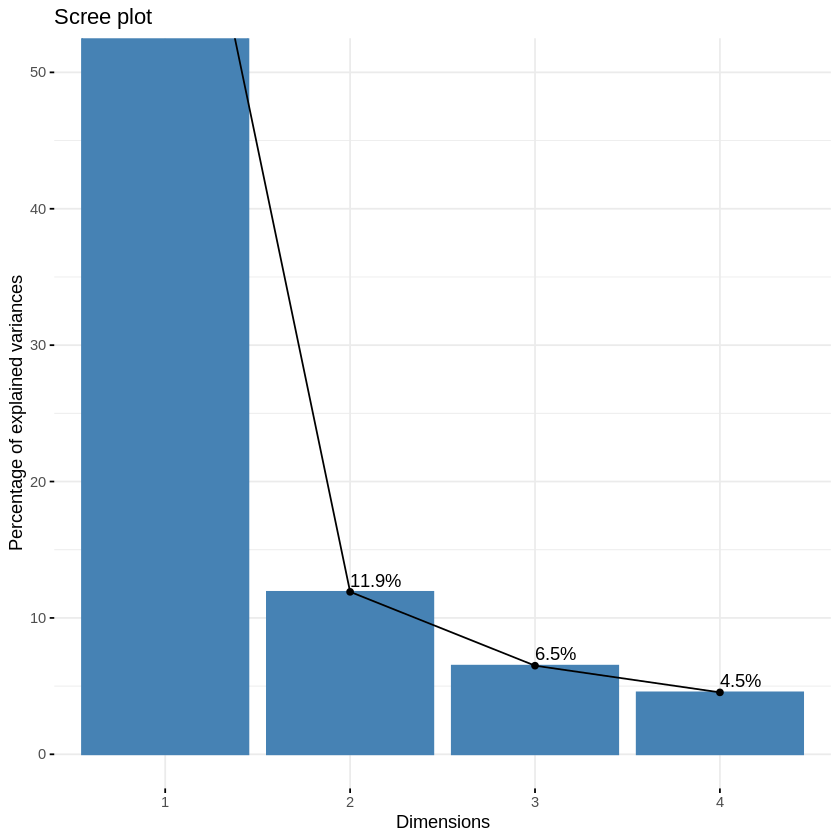

In [ ]:
fviz_eig(res.pca, addlabels = TRUE, ylim = c(0, 50))

In [ ]:
var <- get_pca_var(res.pca)
var

Principal Component Analysis Results for variables
  Name       Description                                    
1 "$coord"   "Coordinates for the variables"                
2 "$cor"     "Correlations between variables and dimensions"
3 "$cos2"    "Cos2 for the variables"                       
4 "$contrib" "contributions of the variables"               

In [ ]:
# Coordinates
head(var$coord)
# Cos2: quality on the factore map
head(var$cos2)
# Contributions to the principal components
head(var$contrib)

,Dim.1,Dim.2,Dim.3,Dim.4
John,0.7955622,0.59516896,0.108723456,0.03215554
Luke,0.8819262,-0.30967685,0.299779242,0.19088964
Mark,0.9029925,-0.07395484,-0.397694197,0.14482579
Matthew,0.9251351,-0.14441253,0.008901894,-0.35098538


,Dim.1,Dim.2,Dim.3,Dim.4
John,0.6329191,0.354226088,1.182079e-02,0.001033979
Luke,0.7777938,0.095899750,8.986759e-02,0.036438854
Mark,0.8153955,0.005469318,1.581607e-01,0.020974510
Matthew,0.8558750,0.020854980,7.924372e-05,0.123190738


,Dim.1,Dim.2,Dim.3,Dim.4
John,20.53610,74.346938,4.54771175,0.5692523
Luke,25.23679,20.127972,34.57399335,20.0612412
Mark,26.45684,1.147931,60.84780814,11.5474191
Matthew,27.77027,4.377159,0.03048676,67.8220874


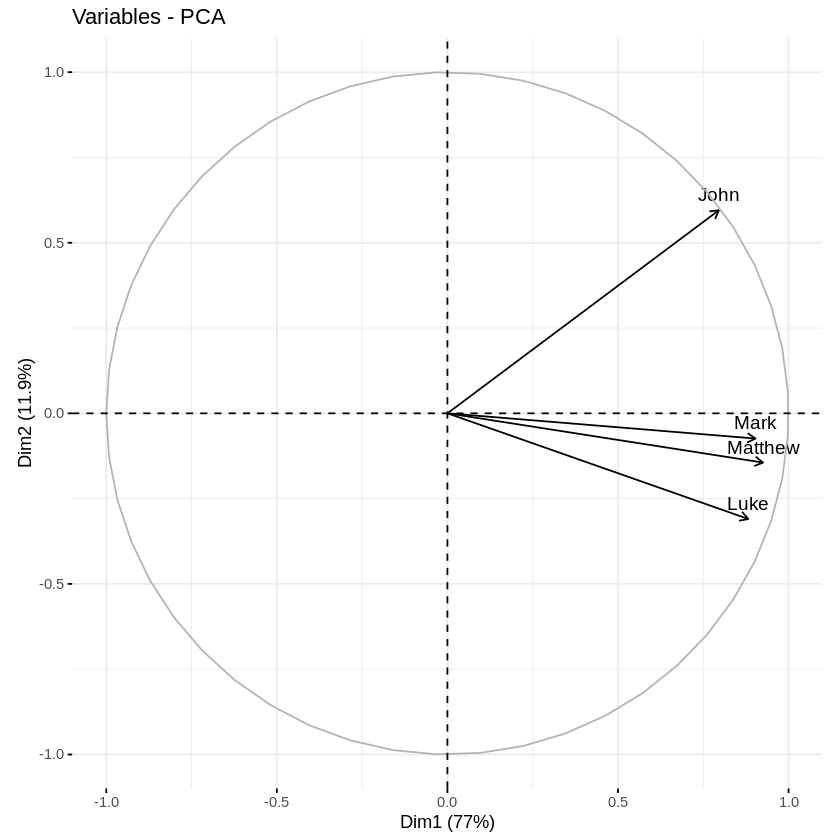

In [ ]:
fviz_pca_var(res.pca, col.var = "black")

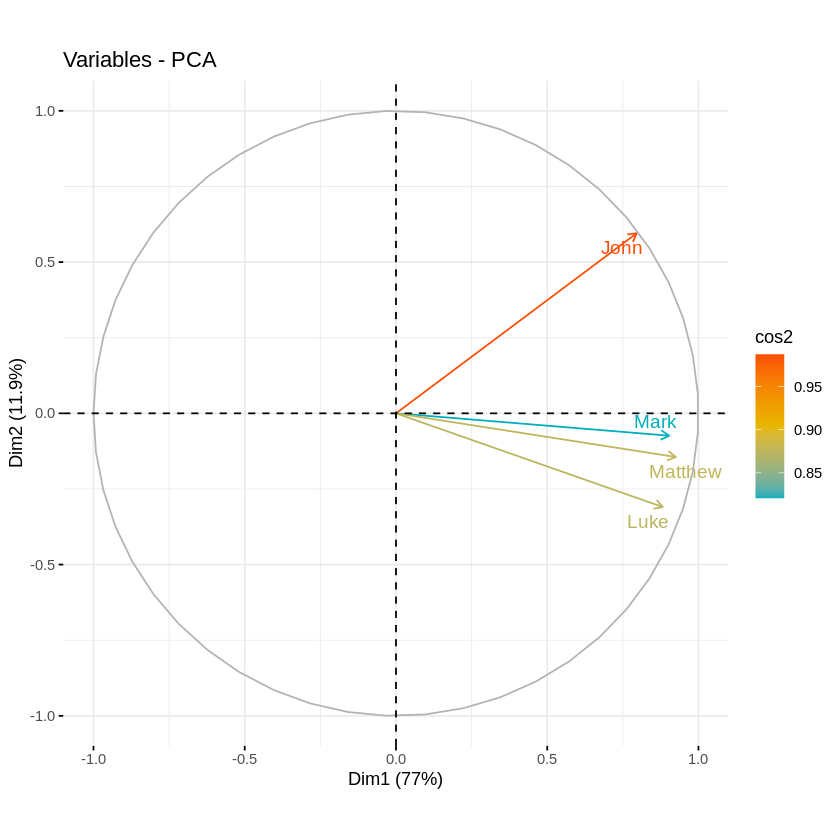

In [ ]:
fviz_pca_var(res.pca, col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE
             )

corrplot 0.92 loaded



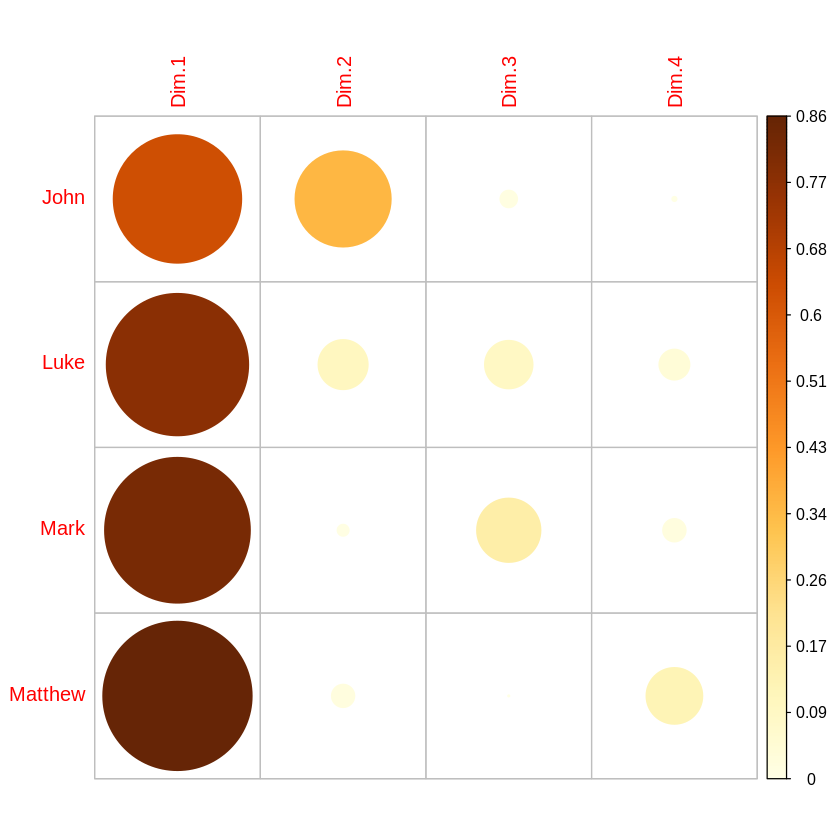

In [ ]:
library("corrplot")
corrplot(var$cos2, is.corr=FALSE)

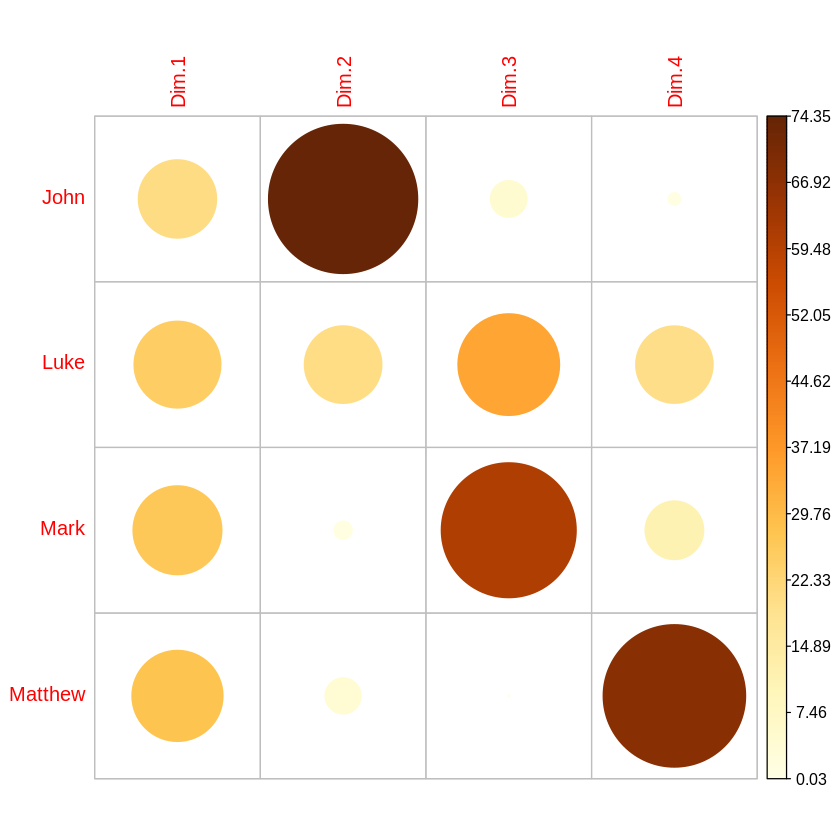

In [ ]:
corrplot(var$contrib, is.corr=FALSE)

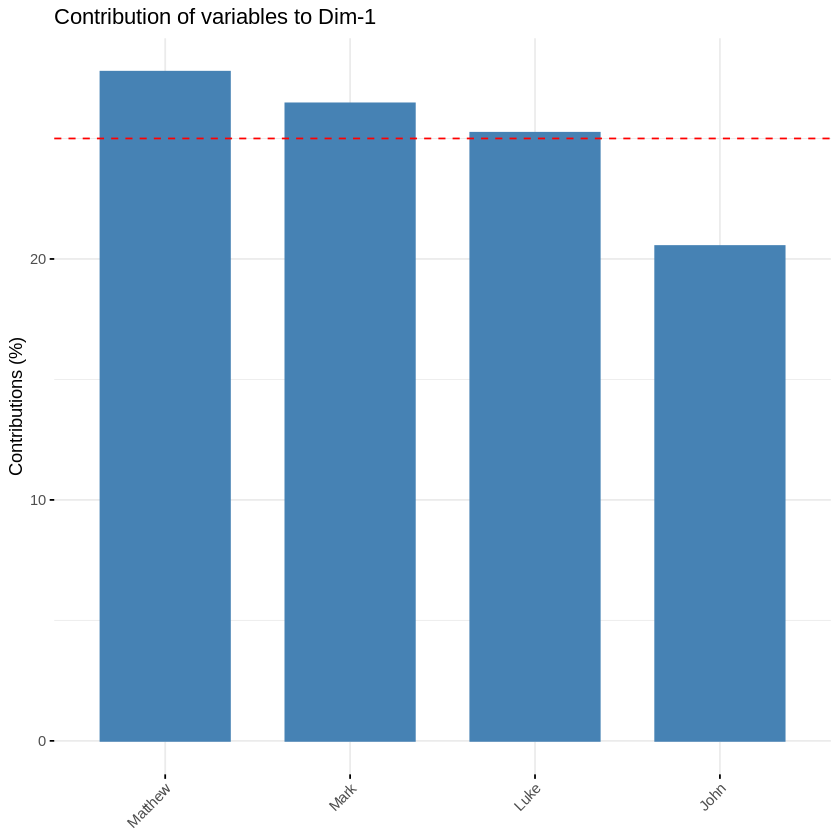

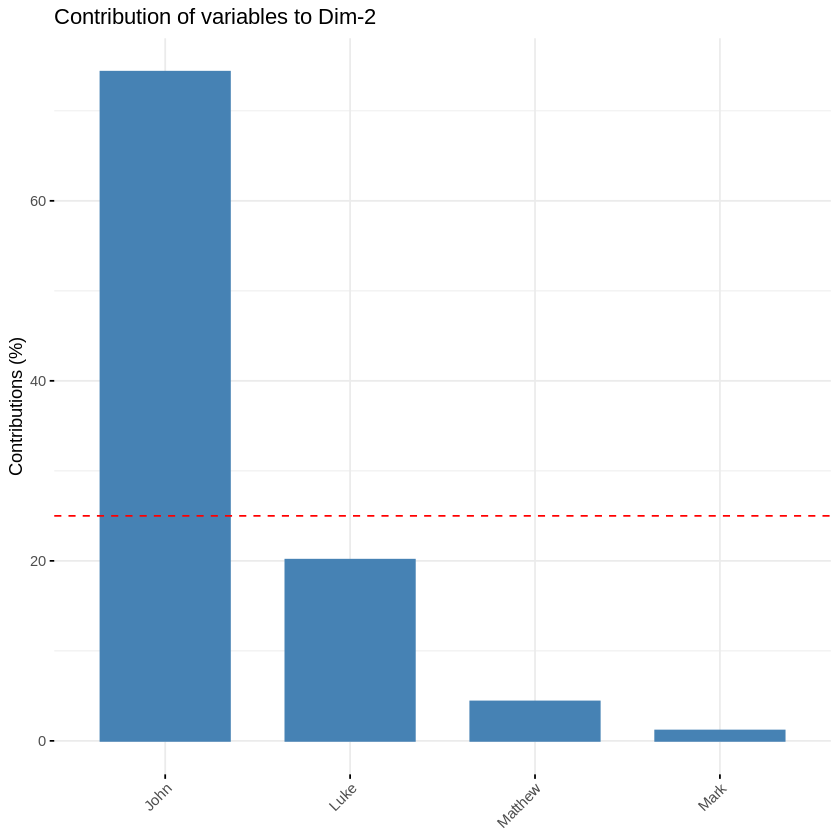

In [ ]:
fviz_contrib(res.pca, choice = "var", axes = 1, top = 10)

fviz_contrib(res.pca, choice = "var", axes = 2, top = 10)

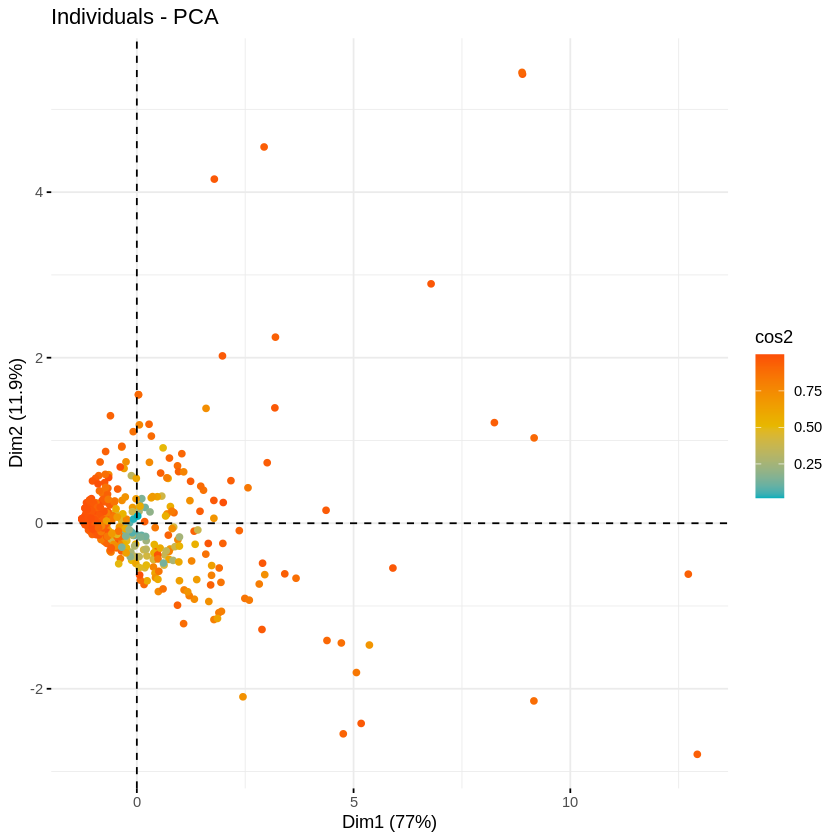

In [ ]:
fviz_pca_ind(res.pca, col.ind = "cos2", geom.ind = "point",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Avoid text overlapping (slow if many points)
             )

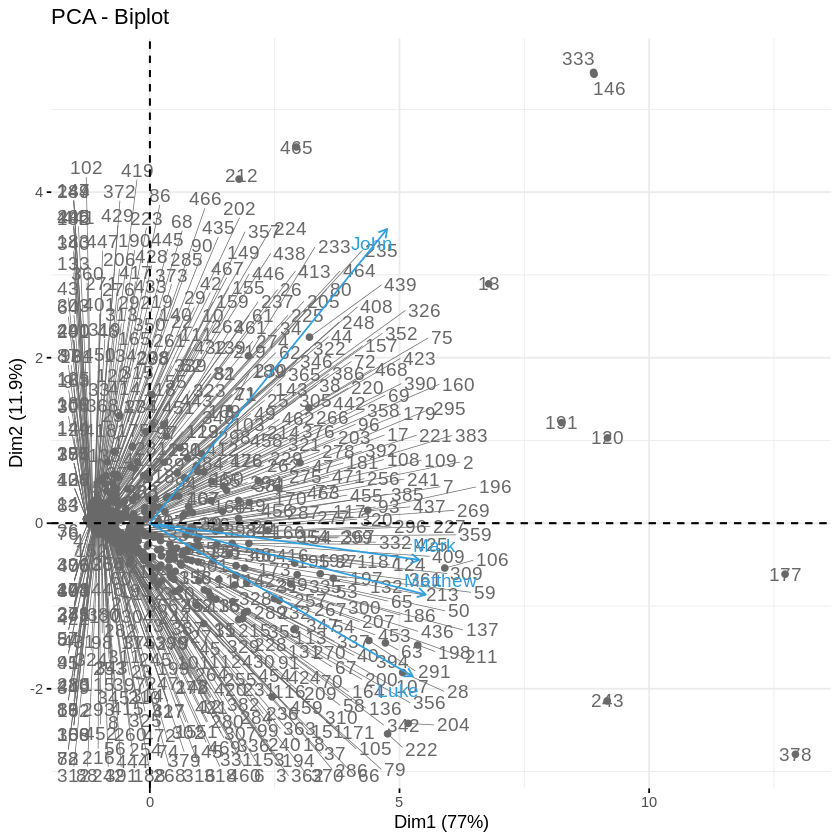

In [ ]:
fviz_pca_biplot(res.pca, repel = TRUE,
                col.var = "#2E9FDF", # Variables color
                col.ind = "#696969"  # Individuals color
                )